## This is a notebook that use Linear Regression to predict the Cummulative Grade Point


#Import modules


In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Loading the dataset

In [2]:
#Load the data

df = pd.read_excel (r'C:\Users\Dell\Downloads\Y2S2.xlsx', sheet_name='Sheet1')



In [3]:
#Display the first 7 row of data
df.head(7)

,Gender,State,MPU3123,UCCD2003,UCCD2044,UCCD2203,UCCD2223,UCCN2243,Semester1_GPA,Semester1_CGPA,Semester2_CGPA
0,Female,Pahang,67,73,72,80,61,57,3.07500,2.894545,2.869841
1,Male,Kedah,73,73,57,69,82,69,3.01250,2.969091,2.926984
2,Male,Malacca,64,65,65,82,73,53,3.00000,3.005455,3.009524
3,Female,Kelantan,65,71,64,69,81,61,3.05625,2.872727,2.903175
4,Male,Perak,60,67,78,63,72,70,3.13125,2.892727,2.853968
5,Male,Johor,72,53,52,65,60,64,2.45000,2.725455,2.723810
6,Female,Negeri Sembilan,63,65,76,63,74,72,3.13125,2.823636,2.869841


In [4]:
#Count the number of rows and columns in the data set
df.shape

(10000, 11)

In [5]:
#Find the column that consist null value
df.isna().sum()

Gender            0
State             0
MPU3123           0
UCCD2003          0
UCCD2044          0
UCCD2203          0
UCCD2223          0
UCCN2243          0
Semester1_GPA     0
Semester1_CGPA    7
Semester2_CGPA    7
dtype: int64

In [6]:
#Remove the row that consist of null value
df1=df.dropna()

In [7]:
#Check the if there still any null value
df1.isna().sum()

Gender            0
State             0
MPU3123           0
UCCD2003          0
UCCD2044          0
UCCD2203          0
UCCD2223          0
UCCN2243          0
Semester1_GPA     0
Semester1_CGPA    0
Semester2_CGPA    0
dtype: int64

In [8]:
df1.describe()

,MPU3123,UCCD2003,UCCD2044,UCCD2203,UCCD2223,UCCN2243,Semester1_GPA,Semester1_CGPA,Semester2_CGPA
count,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000
mean,66.121185,65.826779,65.896027,65.971280,66.023316,66.043330,2.839017,2.862161,2.880231
std,8.420674,8.490299,8.448609,8.428268,8.460699,8.395082,0.274623,0.140411,0.119555
min,43.000000,41.000000,43.000000,43.000000,42.000000,43.000000,1.050000,2.080000,2.361905
25%,60.000000,59.000000,60.000000,60.000000,59.000000,60.000000,2.693750,2.770909,2.800000
50%,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,2.868750,2.867273,2.882540
75%,73.000000,72.000000,72.000000,72.000000,72.000000,72.000000,3.018750,2.960000,2.963492
max,90.000000,88.000000,89.000000,90.000000,89.000000,90.000000,3.525000,3.356364,3.301587


In [9]:
df1.dtypes

Gender             object
State              object
MPU3123             int64
UCCD2003            int64
UCCD2044            int64
UCCD2203            int64
UCCD2223            int64
UCCN2243            int64
Semester1_GPA     float64
Semester1_CGPA    float64
Semester2_CGPA    float64
dtype: object

#Exploratory Data Analysis

[Text(0.5, 1.0, 'Year 2 Semester 2 CGPA')]

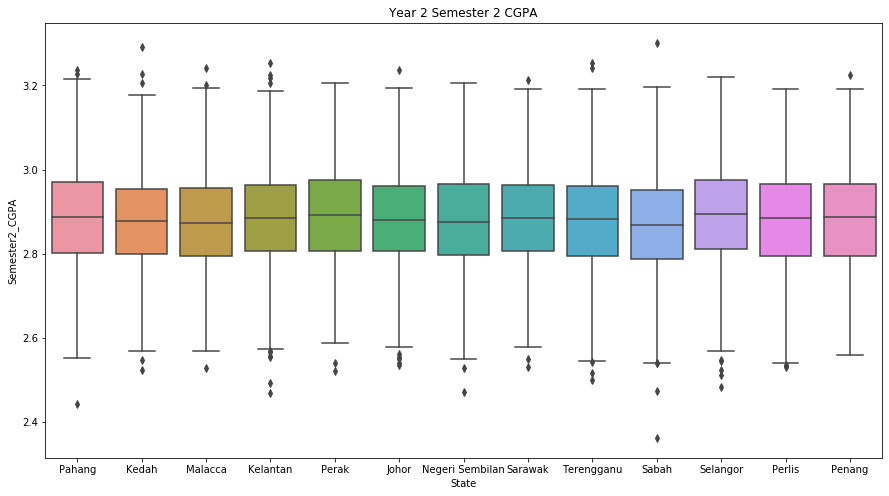

In [10]:
plt.figure(figsize=(15,8))
sns.boxplot(x='State', y='Semester2_CGPA',data=df1).set(title='Year 2 Semester 2 CGPA')

In [11]:
gen =df1[df1['Semester2_CGPA'].between(2.8,3.3)]

In [12]:
#Get a count of the number of each state
gen['State'].value_counts()

Johor              621
Negeri Sembilan    600
Sarawak            593
Terengganu         589
Perlis             588
Kelantan           587
Malacca            587
Selangor           583
Perak              563
Kedah              563
Pahang             557
Sabah              542
Penang             524
Name: State, dtype: int64

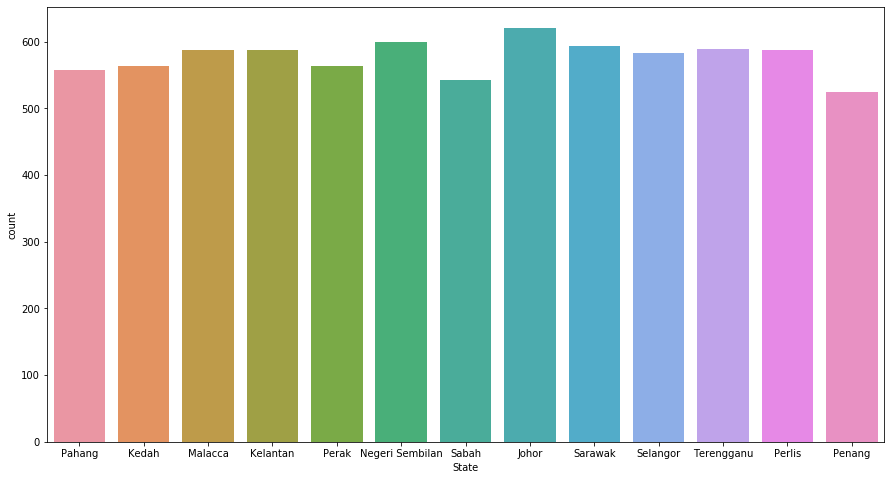

In [13]:
#Visualize the count of Grade
plt.figure(figsize=(15,8))
sns.countplot(gen['State'], label='count')

In [14]:
#Get a count of the number of each Gender
gen['Gender'].value_counts()


Female    3756
Male      3741
Name: Gender, dtype: int64

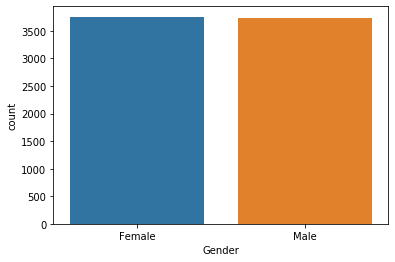

In [15]:
#Visualize the count of Gender
sns.countplot(gen['Gender'], label='count')

#Drop the column that does not related

In [16]:
df1.drop(['Gender','State'], axis='columns', inplace=True)

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [17]:
df1.shape

(9993, 9)

In [18]:
#Print the data after dropping the columns
df1.head()

,MPU3123,UCCD2003,UCCD2044,UCCD2203,UCCD2223,UCCN2243,Semester1_GPA,Semester1_CGPA,Semester2_CGPA
0,67,73,72,80,61,57,3.07500,2.894545,2.869841
1,73,73,57,69,82,69,3.01250,2.969091,2.926984
2,64,65,65,82,73,53,3.00000,3.005455,3.009524
3,65,71,64,69,81,61,3.05625,2.872727,2.903175
4,60,67,78,63,72,70,3.13125,2.892727,2.853968


#Splitting the data

In [19]:
#Split the data set into independent(X) and dependent(Y) data sets
y = df1.iloc[:,-1:]
X = df1.iloc[:,:-1]

In [20]:
#Split the data set into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

#Feature Scaling

In [21]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

#Model Training

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
print("Accuracy:" ,model.score(X_test, y_test)*100)

Accuracy: 89.00374089890374


In [24]:
prediction = model.predict(X_test)
print(prediction)
print(y_test)

[[2.9716435 ]
 [3.0103034 ]
 [3.00731128]
 ...
 [2.98232242]
 [2.77699139]
 [2.87262872]]
      Semester2_CGPA
4601        2.936508
4591        2.973016
8989        2.990476
6622        2.912698
5554        2.879365
...              ...
8411        2.849206
2258        2.731746
6611        3.000000
1211        2.780952
2631        2.904762

[2998 rows x 1 columns]


In [25]:
import pickle 
pickle_out = open("Y2S2.pkl", mode = "wb") 
pickle.dump(model, pickle_out) 
pickle_out.close()